In [10]:
%run ./graph_stats.ipynb
%run ./graph_sampling.ipynb

In [11]:
import netcomp as nc
import pandas as pd
import seaborn as sns

In [12]:
contact_adj_mat_files = ['output/temporally_aggregate_matrices/contact/agg_mat_InVS13.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_InVS15.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_LH10.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_LyonSchool.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_SFHH.npy',
                         'output/temporally_aggregate_matrices/contact/agg_mat_Thiers13.npy']

copresence_adj_mat_files = ['output/temporally_aggregate_matrices/co-presence/agg_mat_pres_InVS13.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_InVS15.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_LH10.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_LyonSchool.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_SFHH.npy',
                            'output/temporally_aggregate_matrices/co-presence/agg_mat_pres_Thiers13.npy']

agg_mat_InVS13 = np.load(contact_adj_mat_files[0])
agg_mat_InVS15 = np.load(contact_adj_mat_files[1])
agg_mat_LH10 = np.load(contact_adj_mat_files[2])
agg_mat_LyonSchool = np.load(contact_adj_mat_files[3])
agg_mat_SFHH = np.load(contact_adj_mat_files[4])
agg_mat_Thiers13 = np.load(contact_adj_mat_files[5])

agg_mat_pres_InVS13 = np.load(copresence_adj_mat_files[0])
agg_mat_pres_InVS15 = np.load(copresence_adj_mat_files[1])
agg_mat_pres_LH10 = np.load(copresence_adj_mat_files[2])
agg_mat_pres_LyonSchool = np.load(copresence_adj_mat_files[3])
agg_mat_pres_SFHH = np.load(copresence_adj_mat_files[4])
agg_mat_pres_Thiers13 = np.load(copresence_adj_mat_files[5])

uw_agg_mat_InVS13 = agg_mat_InVS13
uw_agg_mat_InVS13[uw_agg_mat_InVS13 > 0] = 1
uw_agg_mat_InVS15 = agg_mat_InVS15
uw_agg_mat_InVS15[uw_agg_mat_InVS15 > 0] = 1
uw_agg_mat_LH10 = agg_mat_LH10
uw_agg_mat_LH10[uw_agg_mat_LH10 > 0] = 1
uw_agg_mat_LyonSchool = agg_mat_LyonSchool
uw_agg_mat_LyonSchool[uw_agg_mat_LyonSchool > 0] = 1
uw_agg_mat_SFHH = agg_mat_SFHH
uw_agg_mat_SFHH[uw_agg_mat_SFHH > 0] = 1
uw_agg_mat_Thiers13 = agg_mat_Thiers13
uw_agg_mat_Thiers13[uw_agg_mat_Thiers13 > 0] = 1

uw_agg_mat_pres_InVS13 = agg_mat_pres_InVS13
uw_agg_mat_pres_InVS13[uw_agg_mat_pres_InVS13 > 0] = 1
uw_agg_mat_pres_InVS15 = agg_mat_pres_InVS15
uw_agg_mat_pres_InVS15[uw_agg_mat_pres_InVS15 > 0] = 1
uw_agg_mat_pres_LH10 = agg_mat_pres_LH10
uw_agg_mat_pres_LH10[uw_agg_mat_pres_LH10 > 0] = 1
uw_agg_mat_pres_LyonSchool = agg_mat_pres_LyonSchool
uw_agg_mat_pres_LyonSchool[uw_agg_mat_pres_LyonSchool > 0] = 1
uw_agg_mat_pres_SFHH = agg_mat_pres_SFHH
uw_agg_mat_pres_SFHH[uw_agg_mat_pres_SFHH > 0] = 1
uw_agg_mat_pres_Thiers13 = agg_mat_pres_Thiers13
uw_agg_mat_pres_Thiers13[uw_agg_mat_pres_Thiers13 > 0] = 1

In [13]:
nc.edit_distance(uw_agg_mat_InVS15, uw_agg_mat_pres_InVS15)

12721.0

In [14]:
nc.deltacon0(uw_agg_mat_InVS15, uw_agg_mat_pres_InVS15)

3044.717336460093

In [15]:
nc.lambda_dist(uw_agg_mat_InVS15, uw_agg_mat_pres_InVS15)

1719.4924172437366

In [16]:
# Function to run sampling/distance experiment
def run_sample_and_distance_experiment(contact_A, 
                                       copres_A, 
                                       frac_edges_to_sample, 
                                       sampling_algo,
                                       distance_algo,
                                       num_trials):
    
    if frac_edges_to_sample < 0 or frac_edges_to_sample > 1:
        print("{} is not a proper fraction".format(frac_edges_to_sample))
        return -1
    
    if contact_A.shape[0] != copres_A.shape[0]:
        print("First dimension {} != {} for array shape".format(contact_A.shape[0], 
                                                                copres_A.shape[0]))
        return -1
    
    if contact_A.shape[1] != copres_A.shape[1]:
        print("Second dimension {} != {} for array shape".format(contact_A.shape[1], 
                                                                 copres_A.shape[1]))
        return -1
    
    distances = np.zeros(num_trials)
    for trial_num in range(0, num_trials):
        sampled_copres_mat = sampling_algo(copres_A, frac_edges_to_sample)
        distances[trial_num] = distance_algo(sampled_copres_mat, contact_A)
        
    return distances
        

# Determine Sampling Algos Which Have Smallest Distance

### 80% Sampling Fraction (Edges)

In [17]:
f = 0.8

distance_dict = {}

distance_dict['lambda_UNS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_uniform_node_sampling,
                                                          nc.lambda_dist,
                                                          100)

distance_dict['lambda_UES'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_uniform_edge_sampling,
                                                          nc.lambda_dist,
                                                          100)

distance_dict['lambda_MHRW'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                           agg_mat_pres_InVS13,
                                                           f,
                                                           graph_sampling_algo_metropolis_hastings_random_walk,
                                                           nc.lambda_dist,
                                                           100)

distance_dict['lambda_FS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                         agg_mat_pres_InVS13,
                                                         f,
                                                         graph_sampling_algo_frontier_sampling,
                                                         nc.lambda_dist,
                                                         100)

distance_dict['lambda_SES'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_snowball_expansion_sampling,
                                                          nc.lambda_dist,
                                                          100)

distance_dict['lambda_FFS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_forest_fire_sampling,
                                                          nc.lambda_dist,
                                                          100)


distance_dict['deltacon0_UNS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_uniform_node_sampling,
                                                          nc.deltacon0,
                                                          100)

distance_dict['deltacon0_UES'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_uniform_edge_sampling,
                                                          nc.deltacon0,
                                                          100)

distance_dict['deltacon0_MHRW'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                           agg_mat_pres_InVS13,
                                                           f,
                                                           graph_sampling_algo_metropolis_hastings_random_walk,
                                                           nc.deltacon0,
                                                           100)

distance_dict['deltacon0_FS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                         agg_mat_pres_InVS13,
                                                         f,
                                                         graph_sampling_algo_frontier_sampling,
                                                         nc.deltacon0,
                                                         100)

distance_dict['deltacon0_SES'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_snowball_expansion_sampling,
                                                          nc.deltacon0,
                                                          100)

distance_dict['deltacon0_FFS'] = run_sample_and_distance_experiment(agg_mat_InVS13,
                                                          agg_mat_pres_InVS13,
                                                          f,
                                                          graph_sampling_algo_forest_fire_sampling,
                                                          nc.deltacon0,
                                                          100)

df_80pct_UNS_UES_MHRW_FS_SES_FFS_InVS13 = pd.DataFrame(distance_dict)
df_80pct_UNS_UES_MHRW_FS_SES_FFS_InVS13.to_pickle('output/lambda_deltacon0_distances/df_80pct_UNS_UES_MHRW_FS_SES_FFS_InVS13.pkl')

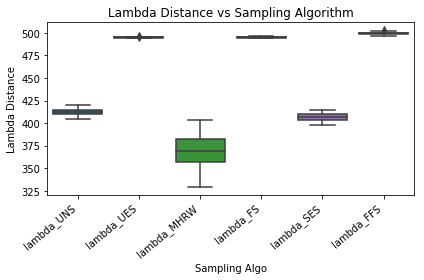

In [25]:
ax = sns.boxplot(data=df_80pct_UNS_UES_MHRW_FS_SES_FFS_InVS13[['lambda_UNS', 
                                                               'lambda_UES', 
                                                               'lambda_MHRW', 
                                                               'lambda_FS', 
                                                               'lambda_SES', 
                                                               'lambda_FFS']])
ax.set(title='Lambda Distance vs Sampling Algorithm', xlabel='Sampling Algo', ylabel='Lambda Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

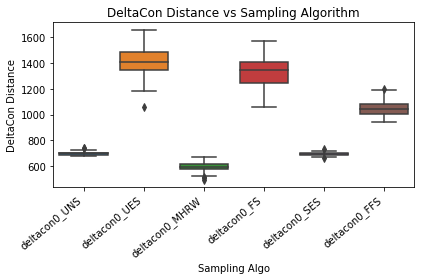

In [27]:
ax = sns.boxplot(data=df_80pct_UNS_UES_MHRW_FS_SES_FFS_InVS13[['deltacon0_UNS', 
                                                               'deltacon0_UES', 
                                                               'deltacon0_MHRW', 
                                                               'deltacon0_FS', 
                                                               'deltacon0_SES', 
                                                               'deltacon0_FFS']])
ax.set(title='DeltaCon Distance vs Sampling Algorithm', xlabel='Sampling Algo', ylabel='DeltaCon Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()